In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from pandas.plotting import lag_plot

In [41]:
data = pd.read_csv('/content/Bitcoin.csv')
data.head()

,SNo,Date,Price,Open,High,Low,Vol.,Change %
0,1,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0
1,2,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0
2,3,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0
3,4,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0
4,5,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SNo       4056 non-null   int64  
 1   Date      4056 non-null   object 
 2   Price     4056 non-null   float64
 3   Open      4056 non-null   float64
 4   High      4056 non-null   float64
 5   Low       4056 non-null   float64
 6   Vol.      4056 non-null   float64
 7   Change %  4056 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 253.6+ KB


In [43]:
data.describe()

,SNo,Price,Open,High,Low,Vol.,Change %
count,4056.000000,4056.000000,4056.000000,4056.000000,4056.000000,4.056000e+03,4056.000000
mean,2028.500000,5422.154586,5409.912081,5575.478526,5227.333703,2.927631e+05,0.494423
std,1171.010675,10817.808737,10795.756471,11141.061147,10406.451635,9.833814e+05,7.739525
min,1.000000,0.100000,0.000000,0.100000,0.000000,0.000000e+00,-57.210000
25%,1014.750000,95.075000,94.925000,99.750000,90.700000,2.713750e+04,-1.170000
50%,2028.500000,591.400000,591.050000,602.500000,580.750000,6.522000e+04,0.000000
75%,3042.250000,7120.200000,7116.450000,7330.250000,6889.200000,1.710725e+05,1.910000
max,4056.000000,63540.900000,63544.200000,64778.000000,62067.500000,2.026000e+07,336.840000


In [44]:
data.isnull().sum()

SNo         0
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [45]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

<ipython-input-45-fa1560e9013b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,SNo,Date,Price,Open,High,Low,Vol.,Change %
0,1,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0
1,2,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0
2,3,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0
3,4,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0
4,5,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0


In [46]:
data.tail()

,SNo,Date,Price,Open,High,Low,Vol.,Change %
4051,4052,2021-08-20,49324.0,46756.7,49343.3,46646.8,83190.0,5.49
4052,4053,2021-08-21,48875.8,49330.0,49719.1,48293.5,18200.0,-0.91
4053,4054,2021-08-22,49254.5,48870.4,49480.3,48151.0,49320.0,0.77
4054,4055,2021-08-23,49539.7,49255.4,50498.8,49038.6,75370.0,0.58
4055,4056,2021-08-24,49768.2,49532.5,49847.4,48812.4,61160.0,0.46


In [47]:
data.duplicated().sum()

0

## EDA


Text(0.5, 1.0, 'Bitcoin Autocorrelation plot')

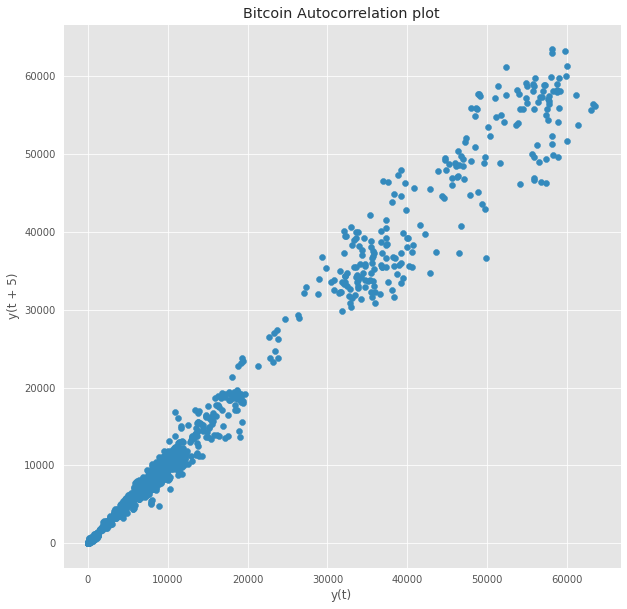

In [48]:
plt.figure(figsize=(10,10))
lag_plot(data['Price'], lag=5)
plt.title('Bitcoin Autocorrelation plot')

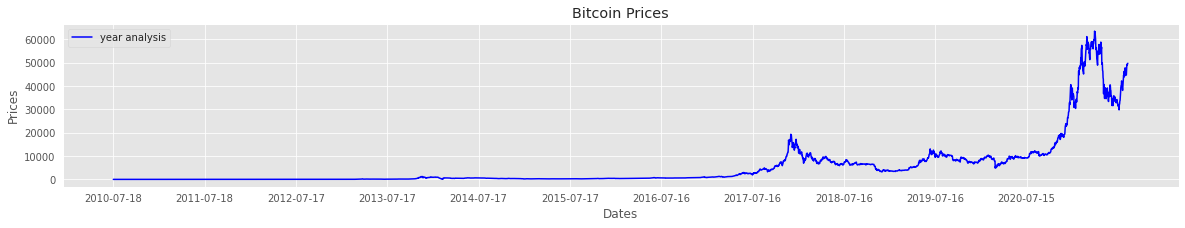

In [49]:
plt.figure(figsize=(20,3))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Price'], 'blue', label= 'year analysis')
plt.xticks(np.arange(0,4015, 365), data['Date'][0:4015:365])
plt.legend()

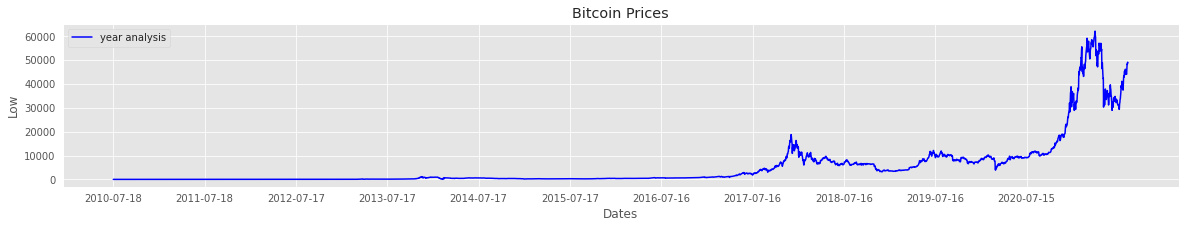

In [50]:
plt.figure(figsize=(20,3))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Low')
plt.plot(data['Low'], 'blue', label= 'year analysis')
plt.xticks(np.arange(0,4015, 365), data['Date'][0:4015:365])
plt.legend()

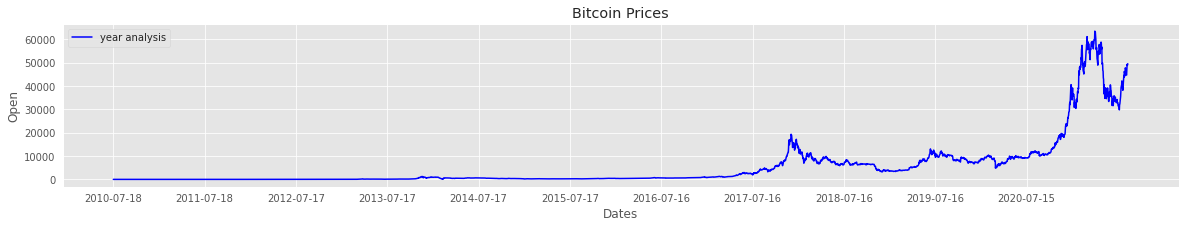

In [51]:
plt.figure(figsize=(20,3))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Open')
plt.plot(data['Open'], 'blue', label= 'year analysis')
plt.xticks(np.arange(0,4015, 365), data['Date'][0:4015:365])
plt.legend()

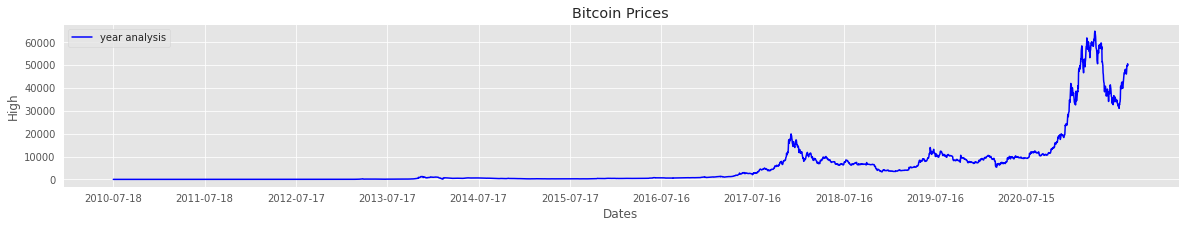

In [52]:
plt.figure(figsize=(20,3))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('High')
plt.plot(data['High'], 'blue', label= 'year analysis')
plt.xticks(np.arange(0,4015, 365), data['Date'][0:4015:365])
plt.legend()

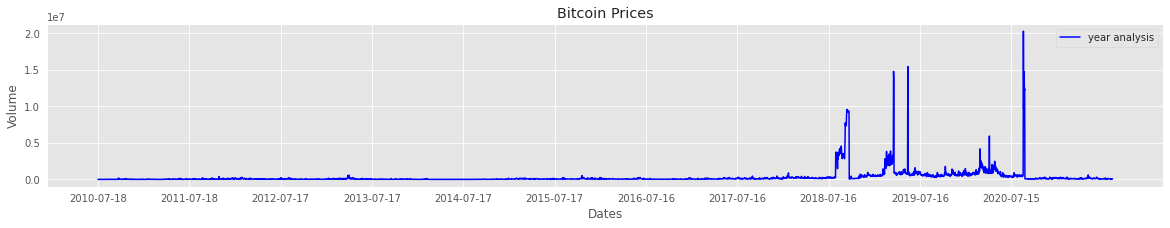

In [53]:
plt.figure(figsize=(20,3))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Volume')
plt.plot(data['Vol.'], 'blue', label= 'year analysis')
plt.xticks(np.arange(0,4015, 365), data['Date'][0:4015:365])
plt.legend()

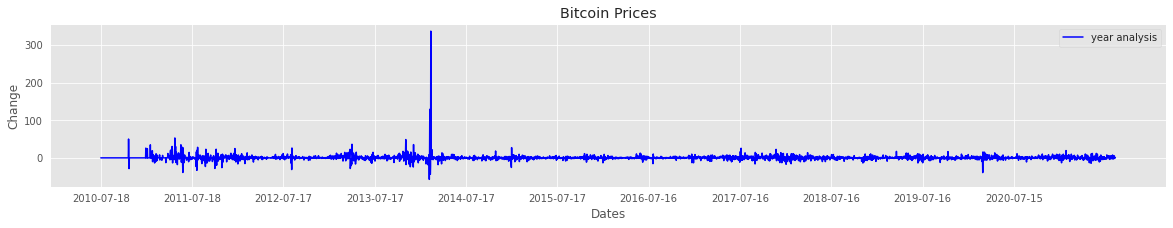

In [54]:
plt.figure(figsize=(20,3))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Change')
plt.plot(data['Change %'], 'blue', label= 'year analysis')
plt.xticks(np.arange(0,4015, 365), data['Date'][0:4015:365])
plt.legend()

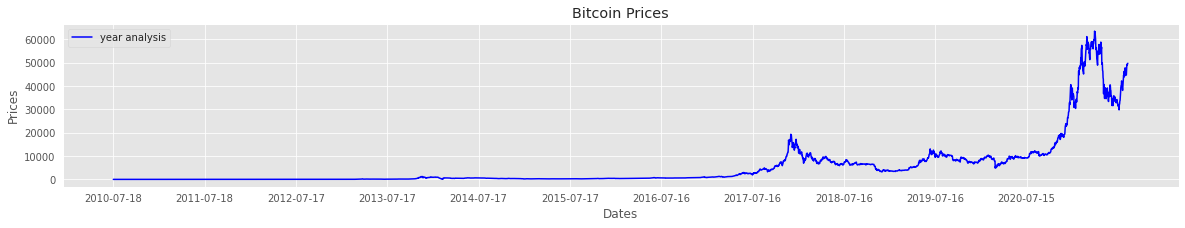

In [55]:
plt.figure(figsize=(20,3))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Price'], 'blue', label= 'year analysis')
plt.xticks(np.arange(0,4015, 365), data['Date'][0:4015:365])
plt.legend()

# weekly analysis

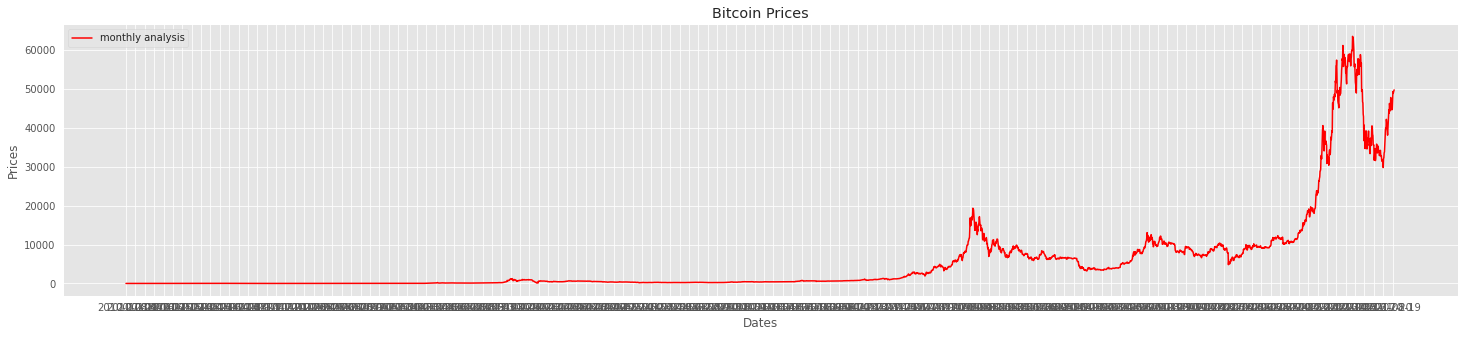

In [56]:
plt.figure(figsize=(25,5))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Price'], 'red', label= 'monthly analysis')
plt.xticks(np.arange(0,4055, 30), data['Date'][0:4055:30])
plt.legend()

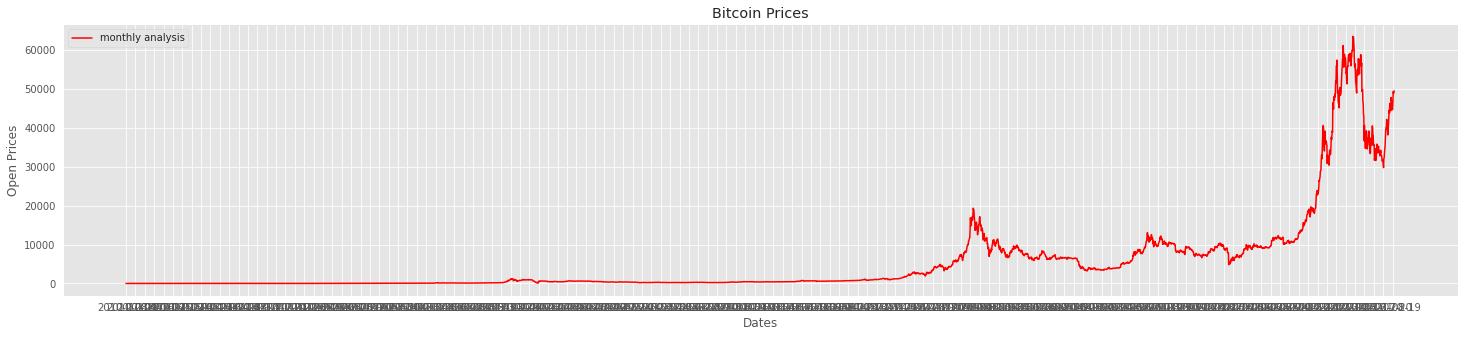

In [57]:
plt.figure(figsize=(25,5))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'red', label= 'monthly analysis')
plt.xticks(np.arange(0,4055, 30), data['Date'][0:4055:30])
plt.legend()

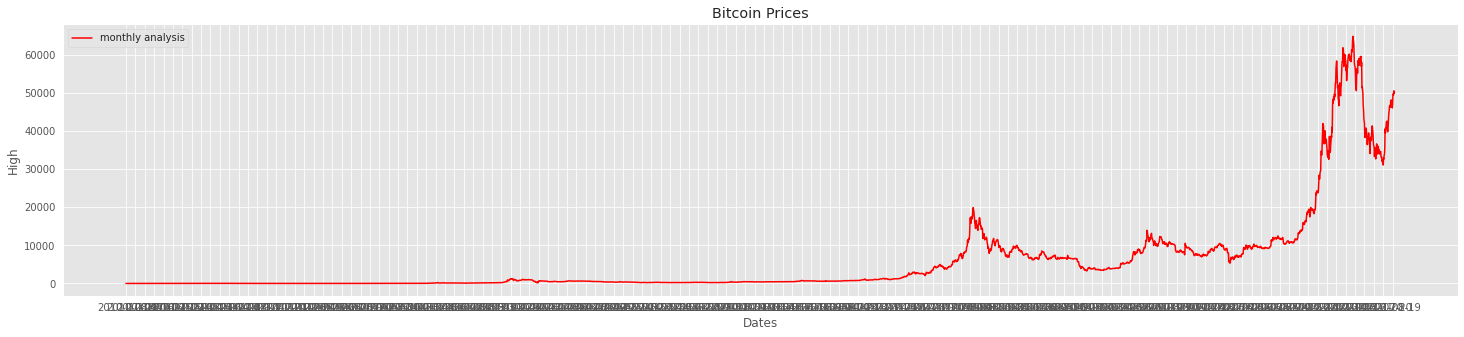

In [58]:
plt.figure(figsize=(25,5))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('High')
plt.plot(data['High'], 'red', label= 'monthly analysis')
plt.xticks(np.arange(0,4055, 30), data['Date'][0:4055:30])
plt.legend()

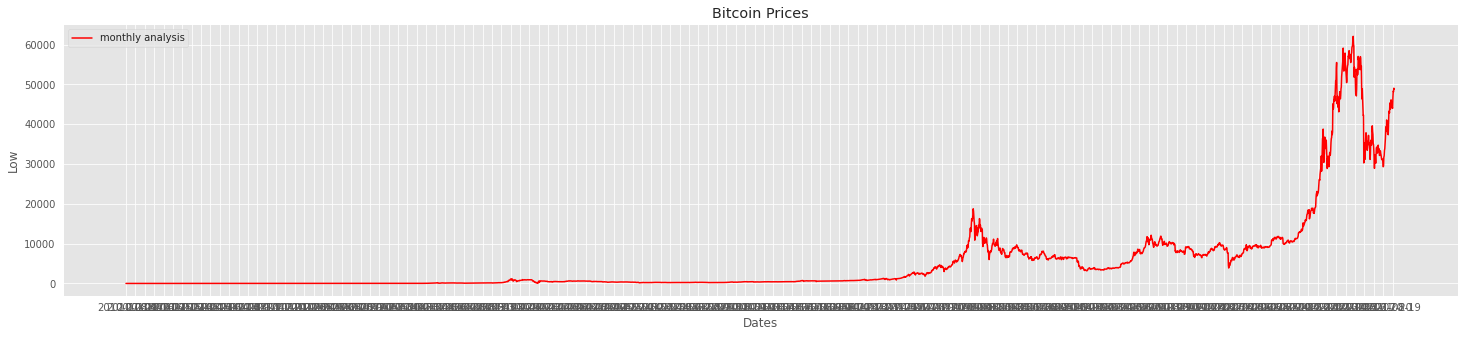

In [59]:
plt.figure(figsize=(25,5))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Low')
plt.plot(data['Low'], 'red', label= 'monthly analysis')
plt.xticks(np.arange(0,4055, 30), data['Date'][0:4055:30])
plt.legend()

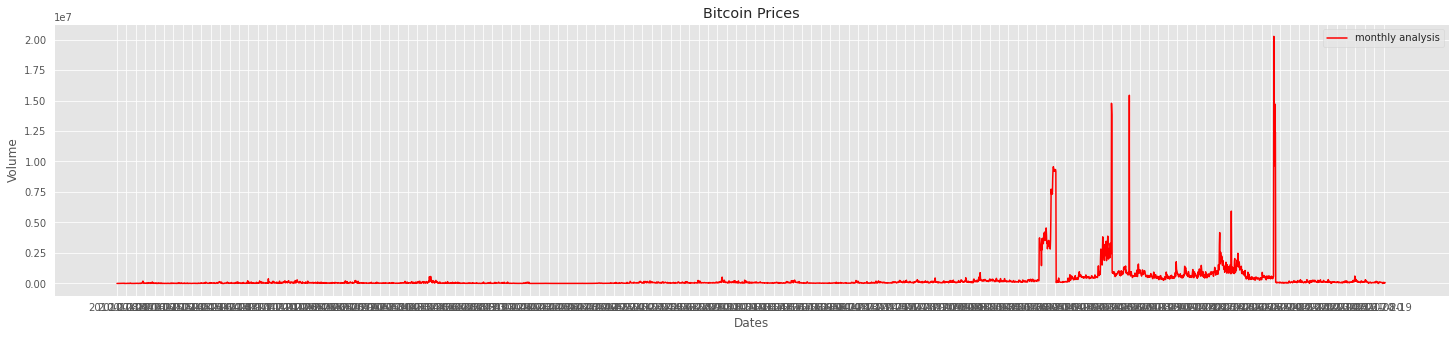

In [60]:
plt.figure(figsize=(25,5))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Volume')
plt.plot(data['Vol.'], 'red', label= 'monthly analysis')
plt.xticks(np.arange(0,4055, 30), data['Date'][0:4055:30])
plt.legend()

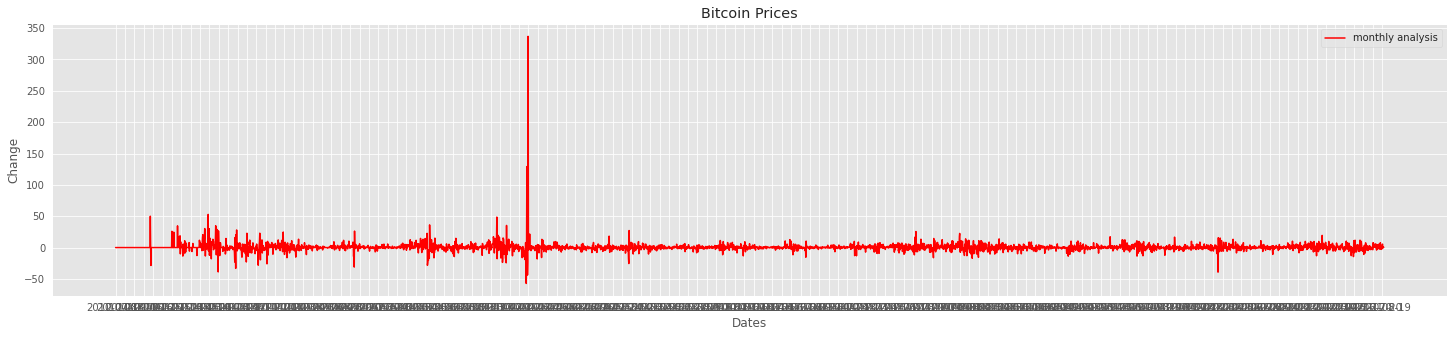

In [61]:
plt.figure(figsize=(25,5))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Change')
plt.plot(data['Change %'], 'red', label= 'monthly analysis')
plt.xticks(np.arange(0,4055, 30), data['Date'][0:4055:30])
plt.legend()

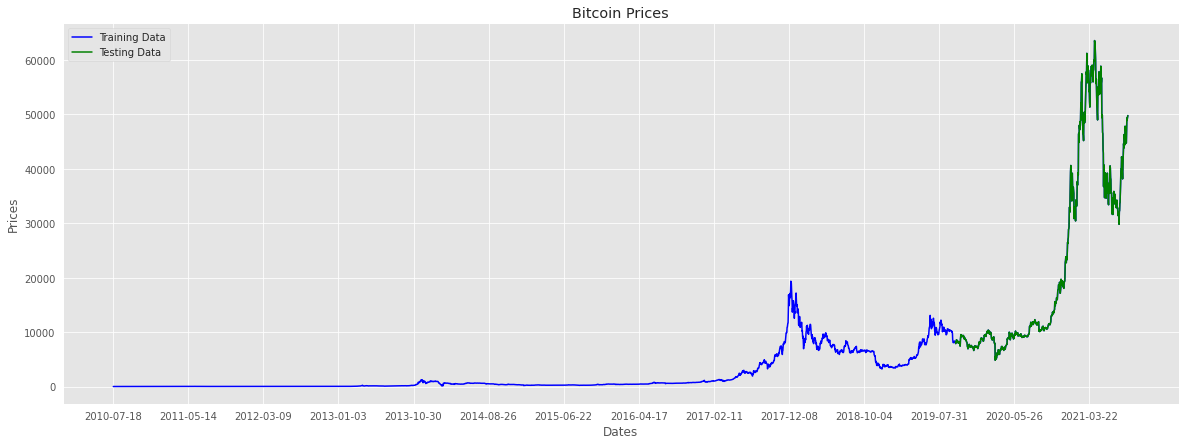

In [62]:
df = data
train_data, test_data = data[0:int(len(df)*0.83)], data[int(len(df)*0.83):]
plt.figure(figsize=(20,7))
plt.title('Bitcoin Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Price'], 'blue', label='Training Data')
plt.plot(test_data['Price'], 'green', label='Testing Data')
plt.xticks(np.arange(0,4055, 300), df['Date'][0:4055:300])
plt.legend()

In [63]:
df = data
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.17, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3281
673


In [64]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [65]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))


#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=20, verbose=1, shuffle =True)
 

Epoch 1/100
165/165 [==============================] - 16s 38ms/step - loss: 3.0501 - accuracy: 0.0076 - val_loss: 0.9050 - val_accuracy: 0.0134
Epoch 2/100
165/165 [==============================] - 4s 25ms/step - loss: 1.4549 - accuracy: 0.0088 - val_loss: 0.8564 - val_accuracy: 0.0134
Epoch 3/100
165/165 [==============================] - 4s 25ms/step - loss: 1.1906 - accuracy: 0.0094 - val_loss: 0.7941 - val_accuracy: 0.0134
Epoch 4/100
165/165 [==============================] - 4s 25ms/step - loss: 1.1016 - accuracy: 0.0094 - val_loss: 0.6279 - val_accuracy: 0.0134
Epoch 5/100
165/165 [==============================] - 4s 25ms/step - loss: 0.9439 - accuracy: 0.0091 - val_loss: 0.6635 - val_accuracy: 0.0134
Epoch 6/100
165/165 [==============================] - 4s 25ms/step - loss: 0.7024 - accuracy: 0.0091 - val_loss: 0.7706 - val_accuracy: 0.0134
Epoch 7/100
165/165 [==============================] - 4s 26ms/step - loss: 0.6684 - accuracy: 0.0094 - val_loss: 0.6018 - val_accuracy

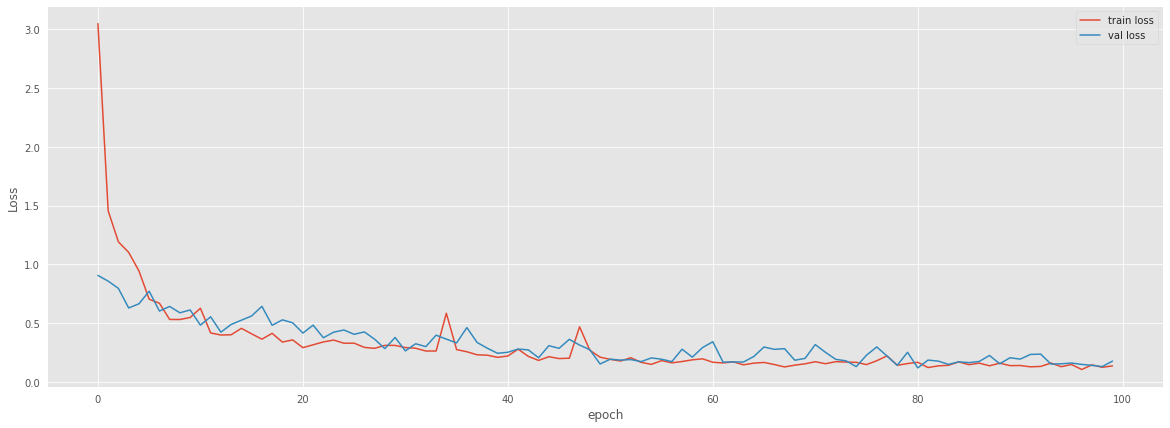

In [66]:
plt.figure(figsize=(20,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [67]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [68]:
p_pred = model.predict(test_X)

22/22 [==============================] - 2s 10ms/step


In [69]:
p_pred = p_pred.flatten()
print(p_pred.round(2))

[ 2.000e-01 -4.400e-01  2.410e+00  1.280e+00  4.000e-02  1.880e+00
 -2.600e-01 -2.100e-01  5.000e-01  2.600e-01  1.530e+00 -2.200e-01
  1.240e+00  3.000e-01  1.500e-01  2.400e-01 -2.600e-01  7.950e+00
 -0.000e+00 -3.200e-01  1.500e-01 -4.100e-01  2.210e+00  1.030e+00
  3.000e-02  2.500e-01  1.910e+00  1.040e+00  7.470e+00  8.500e-01
  4.530e+00  7.400e-01 -2.500e-01 -3.600e-01  9.600e-01  1.060e+00
 -6.000e-02 -7.000e-02  9.000e-02  1.240e+00  2.700e-01  1.390e+00
 -2.700e-01 -2.100e-01  4.700e-01  1.930e+00  1.500e-01  6.160e+00
  3.200e+00  8.270e+00  4.900e-01  7.000e-02  6.000e-02  3.300e+00
 -2.700e-01  1.500e-01  5.900e-01  3.900e-01  3.400e-01  5.400e-01
  9.300e-01  1.460e+00  6.000e-02  5.500e-01 -5.000e-02 -2.100e-01
 -3.900e-01  2.570e+00  1.826e+01 -1.900e-01  6.000e-02  3.000e-01
  2.000e-01 -2.900e-01  1.600e-01  9.000e-02  2.580e+00 -1.000e-01
  4.910e+00  3.900e-01  5.500e-01  1.300e-01 -8.000e-02  2.000e-01
 -3.200e-01  1.940e+00 -2.600e-01 -8.000e-02 -3.200e-01 -3.600

In [70]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 1 0 1 0 0 0 0 

In [71]:
print(y_pred.shape)

(673,)


In [72]:
print(test_Y.shape)

(673, 1, 1)


In [74]:
test_Y.resize((673,))
test_Y.shape

(673,)

In [76]:
print(test_Y)

[ 2.37500000e-01 -4.64932928e-01  3.00000000e+00  1.00000000e+00
 -1.41759156e-01  2.00000000e+00 -3.08239230e-01 -1.85915083e-01
  9.02654867e-01  4.01455428e-01  1.67736747e+00 -2.25974880e-01
  1.69090909e+00  3.87755102e-01  1.42857143e-01  2.80000000e-01
 -3.02338899e-01  8.75000000e+00  1.66666667e-01 -2.59703599e-01
 -1.03030110e-01 -4.89214992e-01  3.00000000e+00  1.21390845e+00
 -2.09267828e-01  2.04049435e-01  1.98901321e+00  1.12500000e+00
  9.07462687e+00  8.86249113e-01  4.82258065e+00  1.01052632e+00
 -2.75214898e-01 -4.62036704e-01  1.09322974e+00  2.00000000e+00
 -2.48979592e-02  4.13440314e-02 -1.92103565e-02  1.23442632e+00
  2.38250653e-01  1.41140892e+00 -3.73000000e-01 -2.31282160e-01
  6.72497871e-01  1.92166655e+00  2.98574103e-01  7.58695652e+00
  3.92619926e+00  1.00000000e+01  6.19205391e-01  2.06337690e-01
 -7.76655069e-02  4.15789474e+00 -3.58953647e-01  2.64150943e-01
  5.89181476e-01  2.18483088e-01  3.36419671e-01  8.13136933e-01
  1.10909091e+00  1.07692

In [77]:
y_true = test_Y

In [78]:
y_true = np.where(test_Y > 0.5, 1, 0)
print(y_true)

[0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 

In [79]:
print(confusion_matrix(y_true, y_pred))

[[435   5]
 [ 21 212]]


In [80]:
print('Precision: %.3f' % precision_score(y_true, y_pred))

Precision: 0.977


In [81]:
	
print('Recall: %.3f' % recall_score(y_true, y_pred))

Recall: 0.910


In [82]:
	
print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))


Accuracy: 0.961


In [83]:
print('F1 Score: %.3f' % f1_score(y_true, y_pred))

F1 Score: 0.942


In [84]:
# here we are calculaing the value of RMSE 
rmse=np.sqrt(np.mean(((p_pred- y_test)**2)))
rmse

3.343364273149432

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDis  (None, 1, 98, 64)        256       
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 21, 64)       

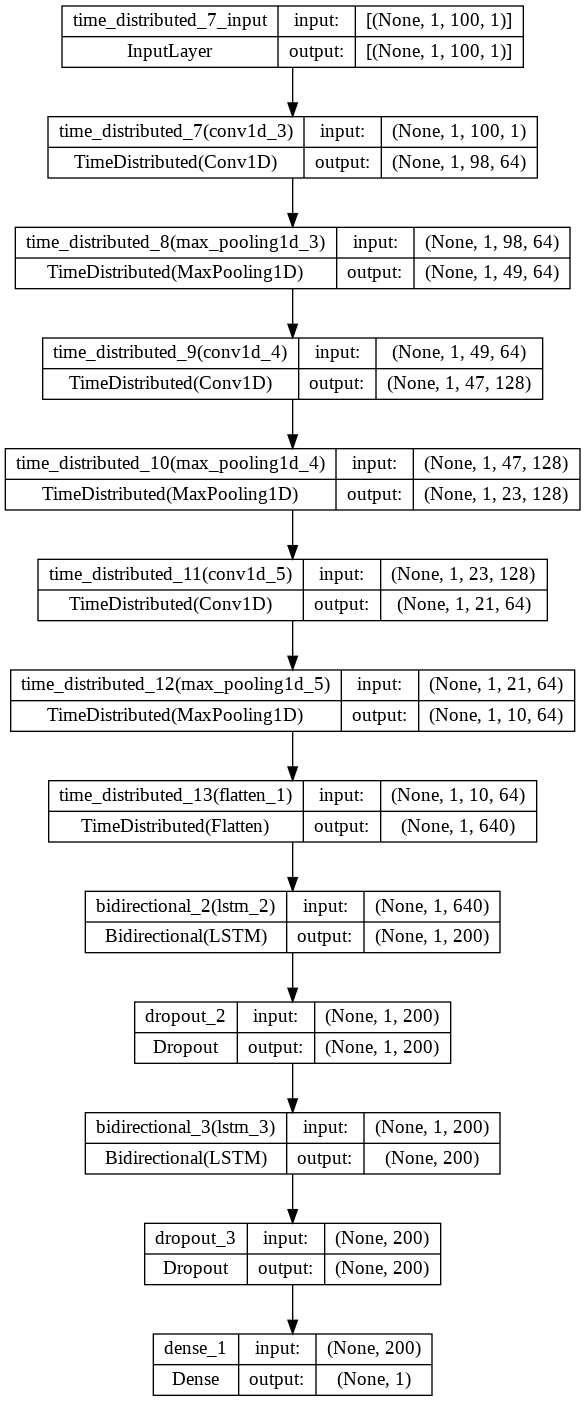

In [85]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)